# Modelagem de uma anomalia de campo total utilizando um prisma vertical

**[Referências]**

* Nagy, D., G. Papp, and J. Benedek (2000), The gravitational potential and its derivatives for the prism: Journal of Geodesy, 74, 552–560, doi: 10.1007/s001900000116.

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import prism_mag

## Carregando os dados de Anitápolis, SC - Brasil

In [3]:
filename = '../../data_set/Total_Field_Anomaly/Anitapolis_data_XYZ_area'

In [4]:
names = ['x','y','geometric','height','longitude','latitude','field']

In [5]:
data = pd.read_csv(filename,usecols=(0,1,2,3,4,5,6),names=names,
                   skipinitialspace=True,delim_whitespace=True).dropna()

In [6]:
longitude = data['longitude'].values
latitude = data['latitude'].values
tf_anomaly = data['field'].values
h_geometric = data['height'].values

In [7]:
x = data['x'].values
y = data['y'].values

In [8]:
x_area = x.max()- x.min()

In [9]:
x_area

15562

In [10]:
y_area = y.max() - y.min()

In [11]:
y_area

16848

## Campo principal

In [12]:
inc_gf = -37.5

In [13]:
dec_gf = -18.15

In [14]:
main_field = inc_gf,dec_gf 

## Visualização da Anomalia de Campo Total - Complexo de Anitápolis, SC

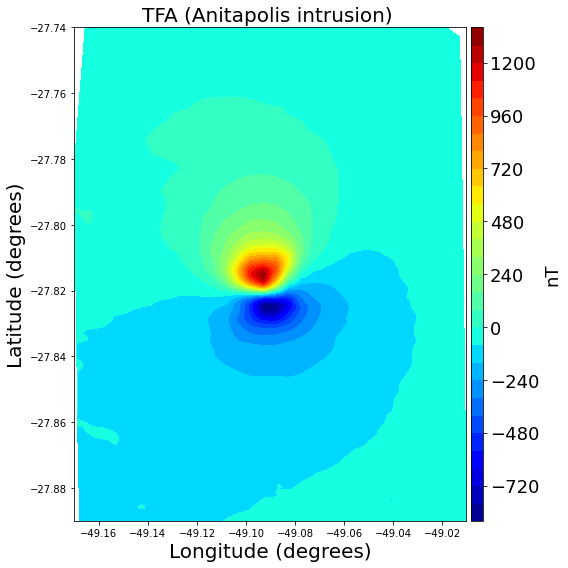

In [15]:
title_font = 20
bottom_font = 18
plt.figure(figsize=(8,8), tight_layout=True)

plt.title('TFA (Anitapolis intrusion) ', fontsize=title_font)
plt.xlabel('Longitude (degrees)',fontsize = title_font)
plt.ylabel('Latitude (degrees)',fontsize = title_font)
plt.tricontourf(longitude,latitude,tf_anomaly,30, cmap='jet')
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

file_name = 'images/anitapolis_real_data'
plt.savefig(file_name+'.png',dpi=300)

plt.show()

## Modelo de prisma vertical

### Gerando os parâmetros do sistema de coordenadas 

In [16]:
Nx = 320
Ny = 200
area = [-8500.,8500.,-7750.,7750.]
shape = (Nx,Ny)

In [17]:
x = np.linspace(area[0],area[1],num=Nx)
y = np.linspace(area[2],area[3],num=Ny) 
yc,xc = np.meshgrid(y,x)

In [18]:
voo = -207.
zc = voo*np.ones_like(xc)

In [19]:
coordenadas = np.array([yc.ravel(),xc.ravel(),zc.ravel()])

### Gerando os parâmetros do prisma

In [20]:
intensidades = np.array([20.5])

In [21]:
direcoes = np.array([[40.,20.]])

In [22]:
modelo = np.array([[-650,650,-650,650,200,3050]])

### Cálculo das componentes do campo magnético

In [23]:
bz = prism_mag.magnetic(coordenadas,modelo,intensidades,direcoes,field="b_z")

In [24]:
bx = prism_mag.magnetic(coordenadas,modelo,intensidades,direcoes,field="b_x")

In [25]:
by = prism_mag.magnetic(coordenadas,modelo,intensidades,direcoes,field="b_y")

### Anomalia de campo total aproximada

In [26]:
I0,D0 = -37.5,-18.15
j0x = np.cos(np.deg2rad(I0))*np.cos(np.deg2rad(D0))
j0y = np.cos(np.deg2rad(I0))*np.sin(np.deg2rad(D0))
j0z = np.sin(np.deg2rad(I0))
tfa = j0x*bx + j0y*by + j0z*bz

## Comparação entre o dado real e o dado modelado

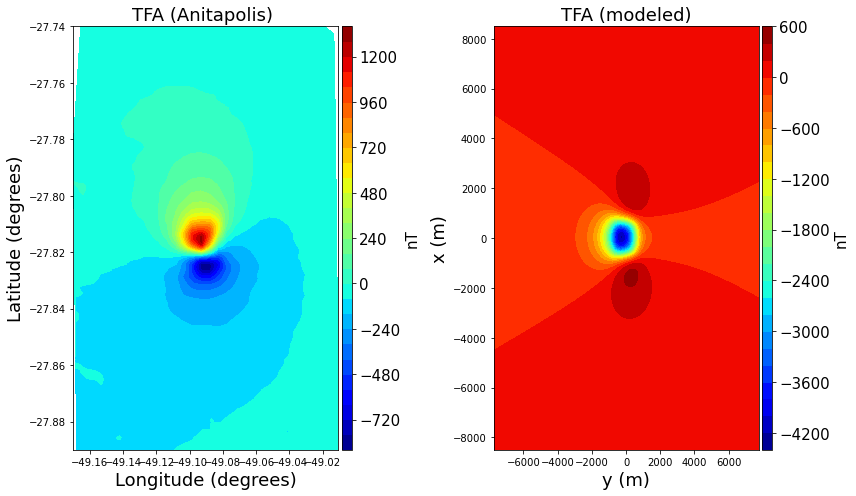

In [27]:
title_font = 18
bottom_font = 15
plt.close('all')
plt.figure(figsize=(12,7), tight_layout=True)

plt.subplot(1,2,1)
plt.title('TFA (Anitapolis) ', fontsize=title_font)
plt.xlabel('Longitude (degrees)',fontsize = title_font)
plt.ylabel('Latitude (degrees)',fontsize = title_font)
plt.tricontourf(longitude,latitude,tf_anomaly,30, cmap='jet')
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

plt.subplot(1,2,2)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('TFA (modeled)', fontsize=title_font)
plt.tricontourf(yc.ravel(),xc.ravel(),tfa.ravel(),30,cmap='jet')
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


plt.show()